# Tracer Boundary Indexing

A temporal notebook that tests the best location to set tracers' open boundary.

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '../../_libs/NEMO_tools.pyc'>

#ANHA4

In [4]:
ANHA4_MAT = scipy.io.loadmat('../../_data/Exchange/NEMO_ANHA4_Ba.mat')
Ba_ini_ANHA4 = ANHA4_MAT['Ba_ini_ANHA4'][:]
nav_lat = ANHA4_MAT['nav_lat'][:]
nav_lon = ANHA4_MAT['nav_lon'][:]

In [5]:
nav_lat.shape

(544, 800)

In [6]:
#domain_ANHA4 = np.zeros(nav_lon.shape)
#field_ANHA4 = np.zeros([50, 544, 800])

In [7]:
#BOUND = 60.0
#for i in range(544):
#    for j in range(800):
#        if (nav_lat[i, j] > BOUND):
#            domain_ANHA4[i, j] = 1.0
#            if (nav_lat[i, j-1] < BOUND):
#                domain_ANHA4[i, j:j-4] = 0.0
#                for k in range(50):
#                    field_ANHA4[k, i, j:j+5] = Ba_ini_ANHA4[k, i, j:j+5]
#field_ANHA4[:, :, 797:800] = Ba_ini_ANHA4[:, :, 797:800]

In [8]:
#fake_domain = np.zeros(domain_ANHA4.shape)
#fake_domain = np.ma.masked_where(domain_ANHA4==1, fake_domain)
#fake_domain = fake_domain[nav_lat>45.5]
#domain_ANHA4[field_ANHA4[0, :, :]>0.5] = 2.0

In [10]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_boundary_ANHA4.mat')
field_ANHA4 = MAT['Ba_boundary'][:]
domain_ANHA4 = MAT['domain'][:]
domain_ANHA4[field_ANHA4[0, :, :]>0.5] = 2.0

#domain_ANHA4[domain_ANHA4<2.0] = np.nan
domain_ANHA4 = np.ma.masked_where(np.isnan(domain_ANHA4), domain_ANHA4)

In [11]:
import matplotlib.patches as mpatches

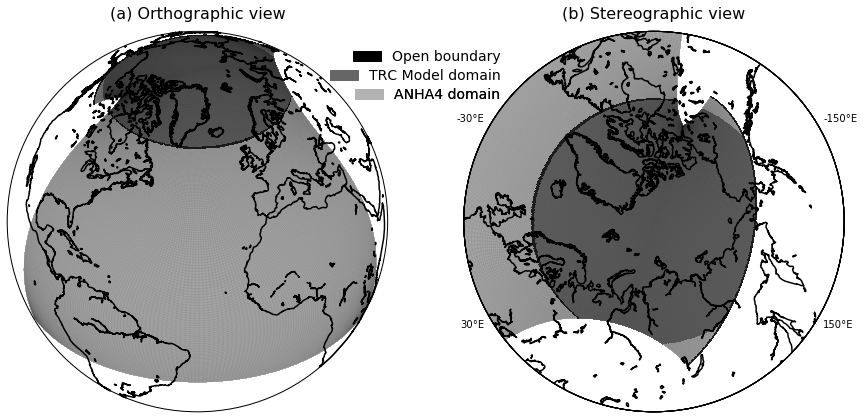

In [27]:
fig=plt.figure(figsize=(15, 15)); ax=plt.gca()

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

proj=Basemap(projection='npstere', resolution='l', boundinglat=45, lon_0=90, round=True, ax=ax2)
proj.drawmeridians(np.array([30, 150, -150, -30]), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.drawcoastlines(linewidth=1.5, color='k', zorder=4)
x, y = proj(nav_lon, nav_lat)
CS=proj.pcolor(x, y, domain_ANHA4, cmap=plt.cm.gray_r, vmin=-1, vmax=2.5)
proj.plot(x, y, 'k-', lw=0.25, alpha=0.2); proj.plot(x.T, y.T, 'k-', lw=0.25, alpha=0.2)
ax2.set_title('(b) Stereographic view', fontsize=16, y=1.02)

patch1 = mpatches.Patch(color='k', label='Open boundary')
legend1 = plt.legend(handles=[patch1], bbox_to_anchor=(0.13, 0.985), prop={'size':14}, frameon=False)
patch2 = mpatches.Patch(color=[0.4, 0.4, 0.4], label='TRC Model domain')
legend2 = plt.legend(handles=[patch2], bbox_to_anchor=(0.13, 0.935), prop={'size':14}, frameon=False)
patch3 = mpatches.Patch(color=[0.7, 0.7, 0.7], label='ANHA4 domain')
legend3 = plt.legend(handles=[patch3], bbox_to_anchor=(0.13, 0.885), prop={'size':14}, frameon=False)
fig.gca().add_artist(legend1); fig.gca().add_artist(legend2); fig.gca().add_artist(legend3)
#fig.savefig('Domain1.png', dpi=200, orientation='portrait', papertype='a4', format='png',
#                bbox_inches='tight', pad_inches=0.1)

proj=Basemap(projection='ortho', resolution='l', lon_0=-32.5, lat_0=37.5, ax=ax1)
proj.drawcoastlines(linestyle='-', color='k', linewidth=1.5, zorder=3)
x, y = proj(nav_lon, nav_lat)
CS=proj.pcolor(x, y, domain_ANHA4, cmap=plt.cm.gray_r, vmin=-1, vmax=2.5)
proj.plot(x, y, 'k-', lw=0.25, alpha=0.2); proj.plot(x.T, y.T, 'k-', lw=0.25, alpha=0.2)
ax1.set_title('(a) Orthographic view', fontsize=16, y=1.02)
fig.savefig('Domain.png', dpi=200, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

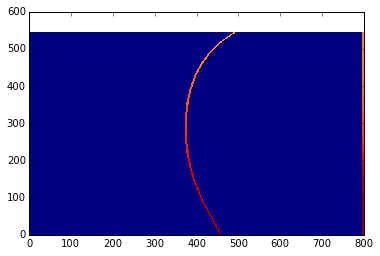

In [19]:
plt.pcolor(field_ANHA4[0, :, :])

In [22]:
#save_var = { 'Ba_boundary': field_ANHA4, 'domain': domain_ANHA4}
#scipy.io.savemat('_data/Exchange/Ba_boundary_ANHA4.mat', mdict=save_var)